In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer       #To visulalize the silhouette score
from yellowbrick.features import RadViz
import matplotlib.cm as cm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
missing_values = ["n/a", "na", "--", "NONE", "None", "none", "NA", "N/A"]

In [3]:
country_data = pd.read_csv('Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Scaling the data


In [4]:
minmax_scale = MinMaxScaler()
country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']] = minmax_scale.fit_transform(country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])

Like the wcss (within cluster sum of squares) or the elbow method one other way of doing it is via KElbowVisualizer of Yellowbrick library
Wherever the knee is forming we can consider that points, here we will choose the points 2,3,4 we will analyze more to understand the better between clusters 2,3 & 4

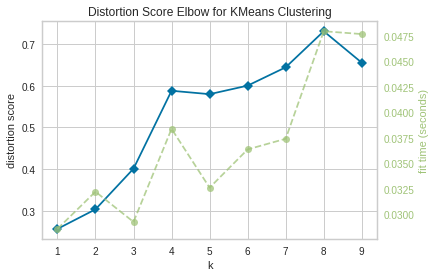

In [5]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])   
# visualizer = RadViz(size=(850, 500))   #(width,height)
visualizer.poof()
# the distortion score on y axis is actually ssd(sum of square distances) from datapoint to centroid

The metric calinski _harabasz is also known as Variance Ratio Criterion and it gives the ratio between the within cluster dispersion and between cluster dispersion. This can also used as elbow method

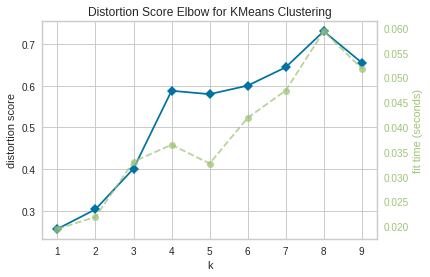

In [6]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10), metrics = 'calinski_harabasz', timings=True)
visualizer.fit(country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])   
# visualizer = RadViz(size=(850, 500))   #(width,height)
visualizer.poof()
# the distortion score on y axis is actually ssd(sum of square distances) from datapoint to centroid

This comes the manual method to find the ssd or elbow method

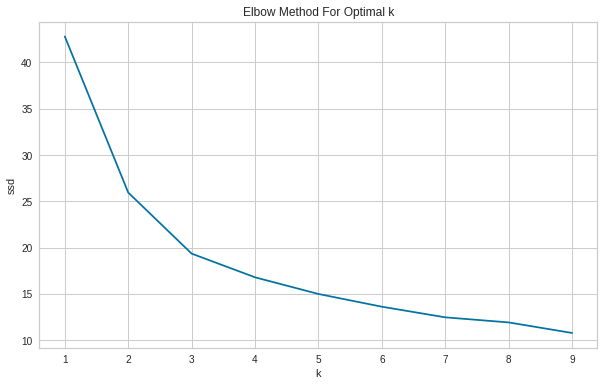

In [7]:
ssd = []
kmeans_range = range(1,10)
for k in kmeans_range:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']] )
    ssd.append(kmeans.inertia_) 
plt.figure(figsize=(10,6))
plt.plot(kmeans_range, ssd)
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
plt.show()

#KMeans model application

In [20]:
Kmeans = KMeans(n_clusters=2,  init= 'k-means++', random_state=42)
country_data['label'] = Kmeans.fit_predict(country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])

In [21]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


In [22]:
country_data.label.value_counts()

0    116
1     51
Name: label, dtype: int64

Principal Component Analysis

In [28]:
pca = PCA(random_state=42)
transformed_data = pca.fit_transform(country_data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])
country_df = pd.DataFrame(data = transformed_data, columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9'])
country_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532,0.076803,0.040610,0.023572
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246,-0.043567,0.030842,0.029833
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988,-0.045604,-0.010198,0.003012
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170,-0.073985,-0.045195,-0.042241
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817,-0.009559,0.026228,0.022455
...,...,...,...,...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043,-0.063646,0.115254,-0.003232,-0.065701
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260,0.291515,0.005521,0.056038,-0.036459
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734,0.089237,-0.039743,-0.006124,-0.017780
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550,0.063254,0.012519,0.014231,-0.011441


In [24]:
country_df['clusters'] = country_data['label']
country_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clusters
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532,0.076803,0.040610,0.023572,1
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246,-0.043567,0.030842,0.029833,0
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988,-0.045604,-0.010198,0.003012,0
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170,-0.073985,-0.045195,-0.042241,1
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817,-0.009559,0.026228,0.022455,0
...,...,...,...,...,...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043,-0.063646,0.115254,-0.003232,-0.065701,1
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260,0.291515,0.005521,0.056038,-0.036459,0
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734,0.089237,-0.039743,-0.006124,-0.017780,0
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550,0.063254,0.012519,0.014231,-0.011441,1


PCA1 and PCA2 holds the highest variance 

In [25]:
pca.explained_variance_

array([0.14180615, 0.03450913, 0.03171502, 0.02513534, 0.00974048,
       0.00776992, 0.00306922, 0.00228894, 0.00178941])

From here we find that 2 clusters will be the best choice here. The silhouette score ranges between -1 to +1 and with 2 clusters the score is 0.37 which is good to go

For n_clusters = 2 The average silhouette_score is : 0.37671430588173566
For n_clusters = 3 The average silhouette_score is : 0.33925909904021984
For n_clusters = 4 The average silhouette_score is : 0.3460019203843148
For n_clusters = 5 The average silhouette_score is : 0.25762680364225143
For n_clusters = 6 The average silhouette_score is : 0.22824464463656272
For n_clusters = 7 The average silhouette_score is : 0.25884682597767344
For n_clusters = 8 The average silhouette_score is : 0.22943263429089128
For n_clusters = 9 The average silhouette_score is : 0.22715781770888227


<Figure size 1800x1440 with 0 Axes>

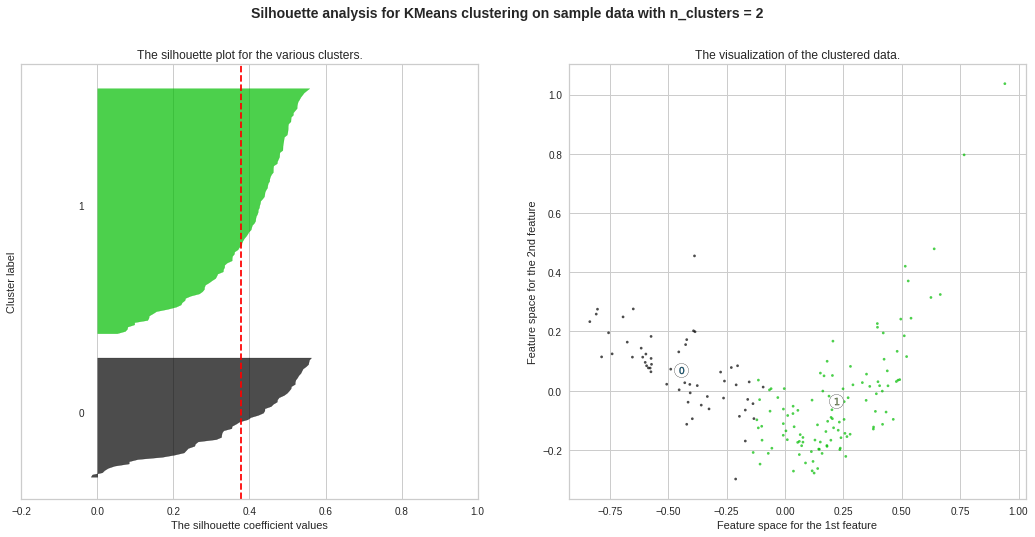

<Figure size 1800x1440 with 0 Axes>

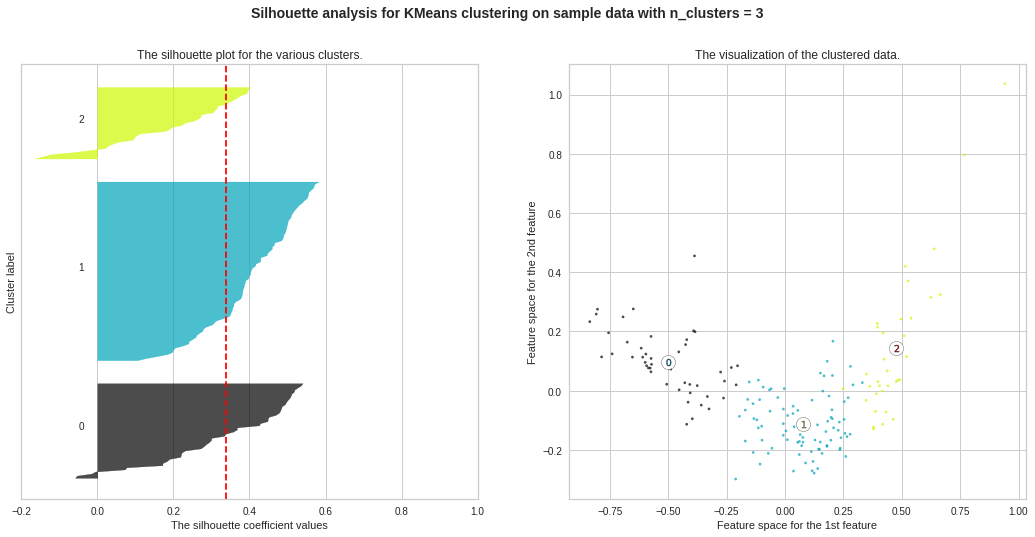

<Figure size 1800x1440 with 0 Axes>

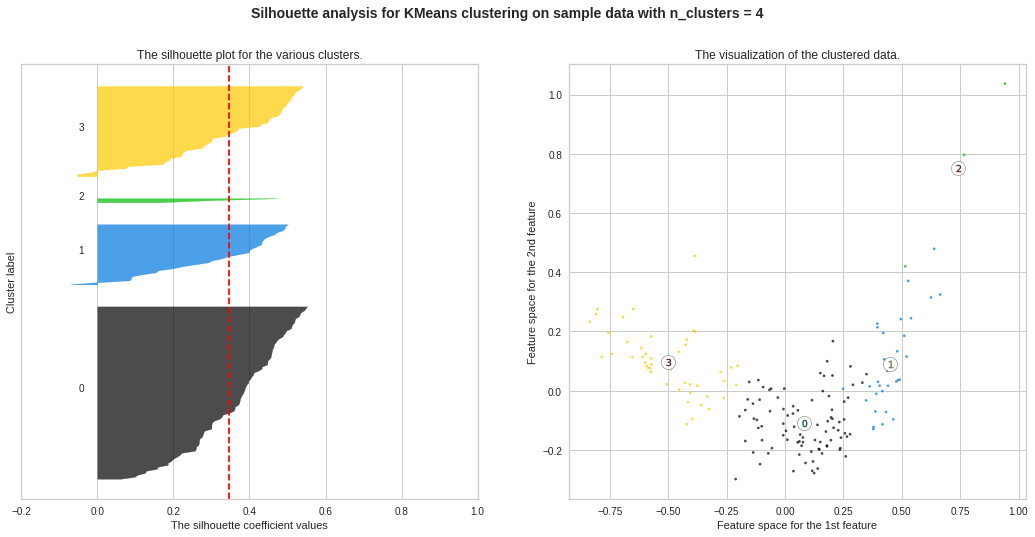

<Figure size 1800x1440 with 0 Axes>

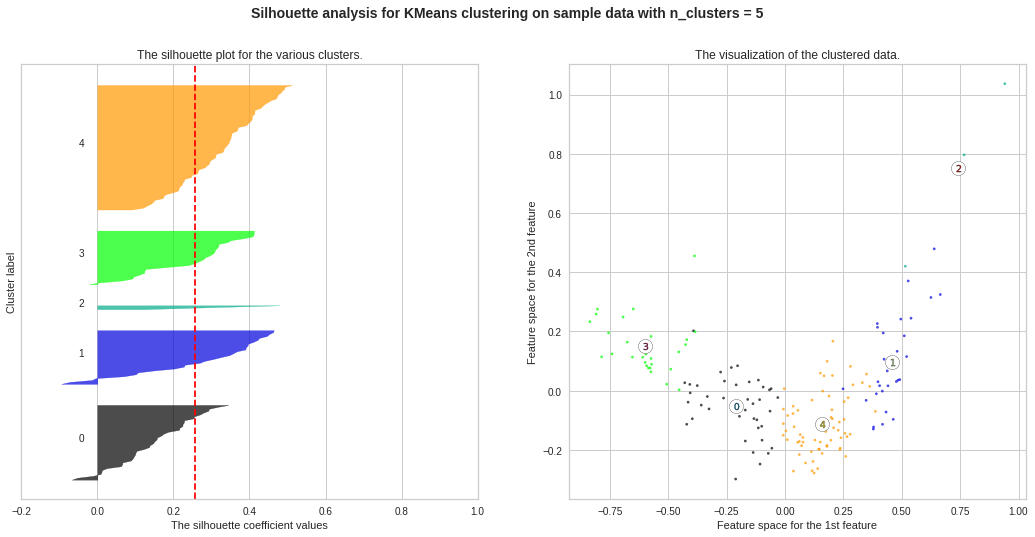

<Figure size 1800x1440 with 0 Axes>

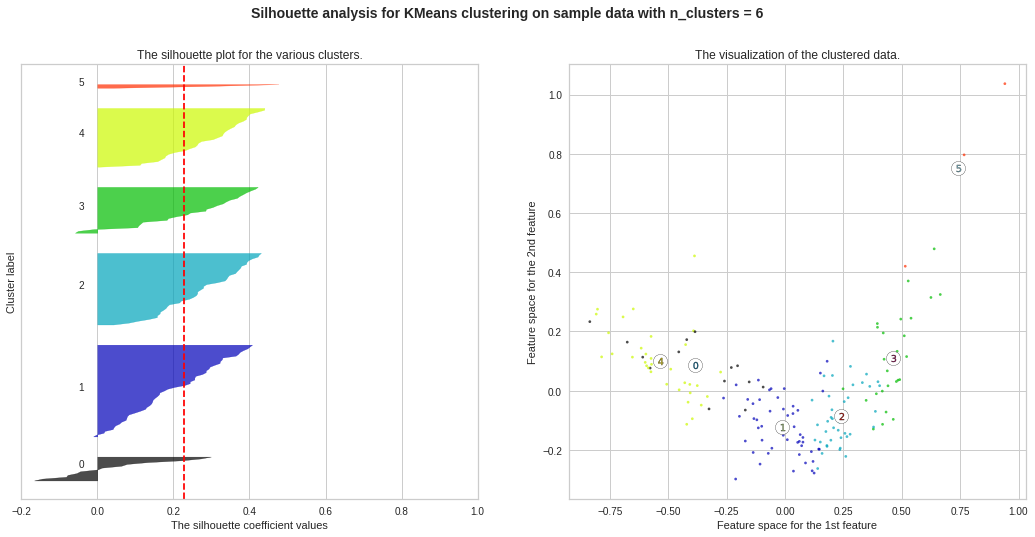

<Figure size 1800x1440 with 0 Axes>

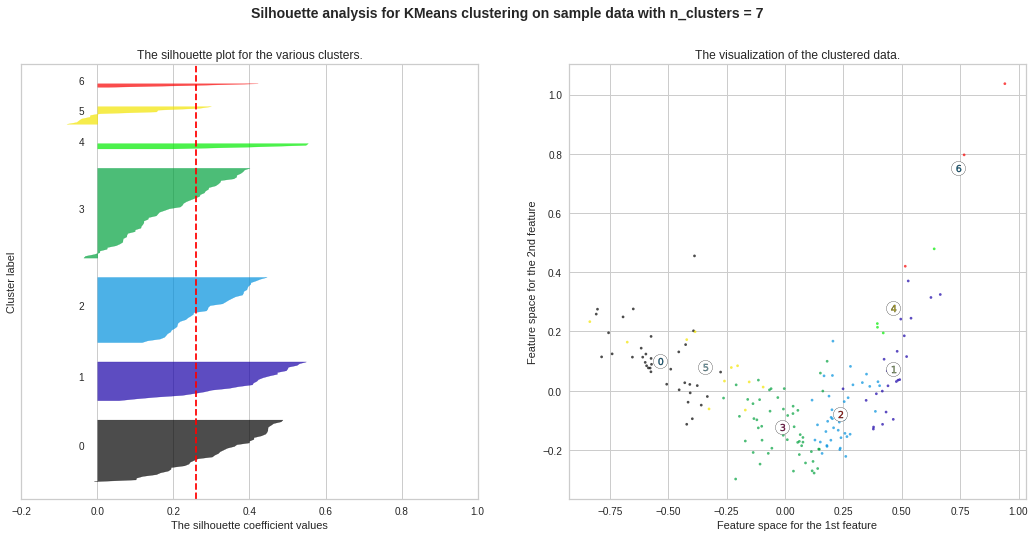

<Figure size 1800x1440 with 0 Axes>

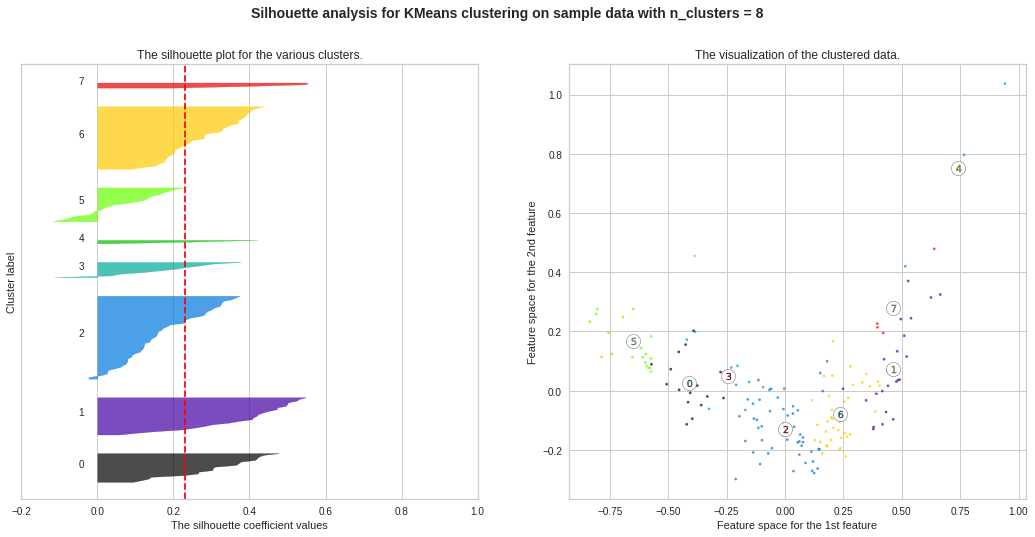

<Figure size 1800x1440 with 0 Axes>

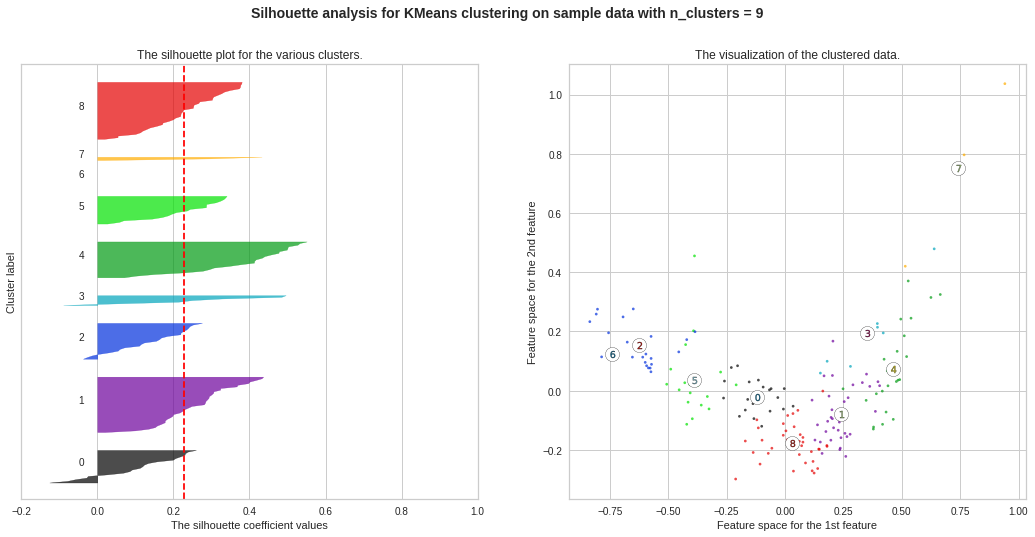

In [26]:
for n_clusters in range(2, 10):
    plt.figure(figsize=(25,20))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but here the range is from -0.2 till 1
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(country_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9']]) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator seed of 12345 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=12345)
    cluster_labels = clusterer.fit_predict(country_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9']])
    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(country_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9']], cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(country_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9']], cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(country_df['PCA1'], country_df['PCA2'], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

#2 clusters will be the best choice

Ploting 2 clusters individually and we can see that the points are not overlapping 

Text(0.5, 1.0, 'Principal Components')

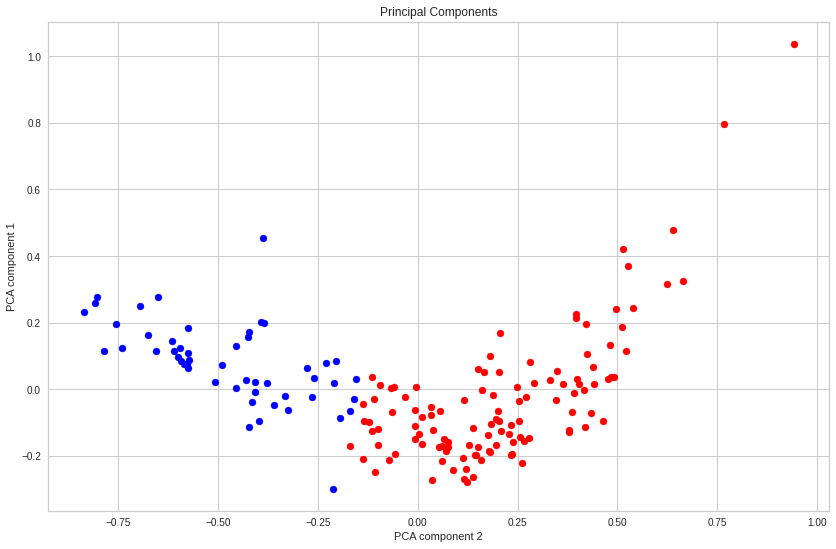

In [27]:
dfg1 = country_df[country_df['clusters']==0]
dfg2 = country_df[country_df['clusters']==1]

plt.figure(figsize=(14,9))
plt.scatter(dfg1['PCA1'],dfg1['PCA2'], c='red')
plt.scatter(dfg2['PCA1'],dfg2['PCA2'], c='blue')

plt.ylabel('PCA component 1')
plt.xlabel('PCA component 2')
plt.title('Principal Components')

In [35]:
cdata = pd.read_csv('Country-data.csv')
cdata['label'] = country_data['label']
cdata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [34]:
cdata.to_csv('Kmeans_country_data_results.csv')